<a href="https://colab.research.google.com/github/chogerlate/cpe342/blob/main/cpe342_a01_1052.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A01: Siwarat Laoprom 65070501052

# Create Dataset

In [19]:
import pandas as pd

data = {
    "Month": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Advertising Budget (X)": [3.0, 5.0, 2.0, 7.0, 8.0, 1.0, 4.0, 6.0, 9.0, 10.0],
    "Sales (Y)": [6.0, 9.0, 4.0, 10.0, 12.0, 3.0, 7.0, 8.0, 13.0, 15.0]
}

# Creating the dataframe
df = pd.DataFrame(data)
df

,Month,Advertising Budget (X),Sales (Y)
0,1,3.0,6.0
1,2,5.0,9.0
2,3,2.0,4.0
3,4,7.0,10.0
4,5,8.0,12.0
5,6,1.0,3.0
6,7,4.0,7.0
7,8,6.0,8.0
8,9,9.0,13.0
9,10,10.0,15.0


# 1.Implement OLS Regression

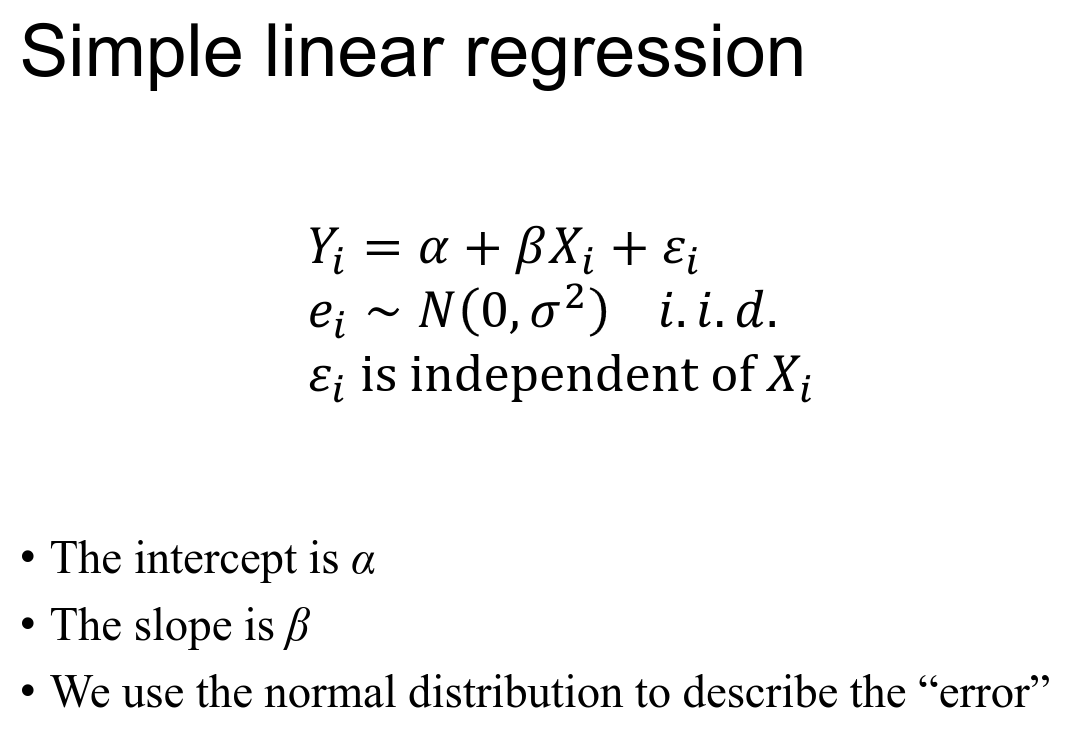

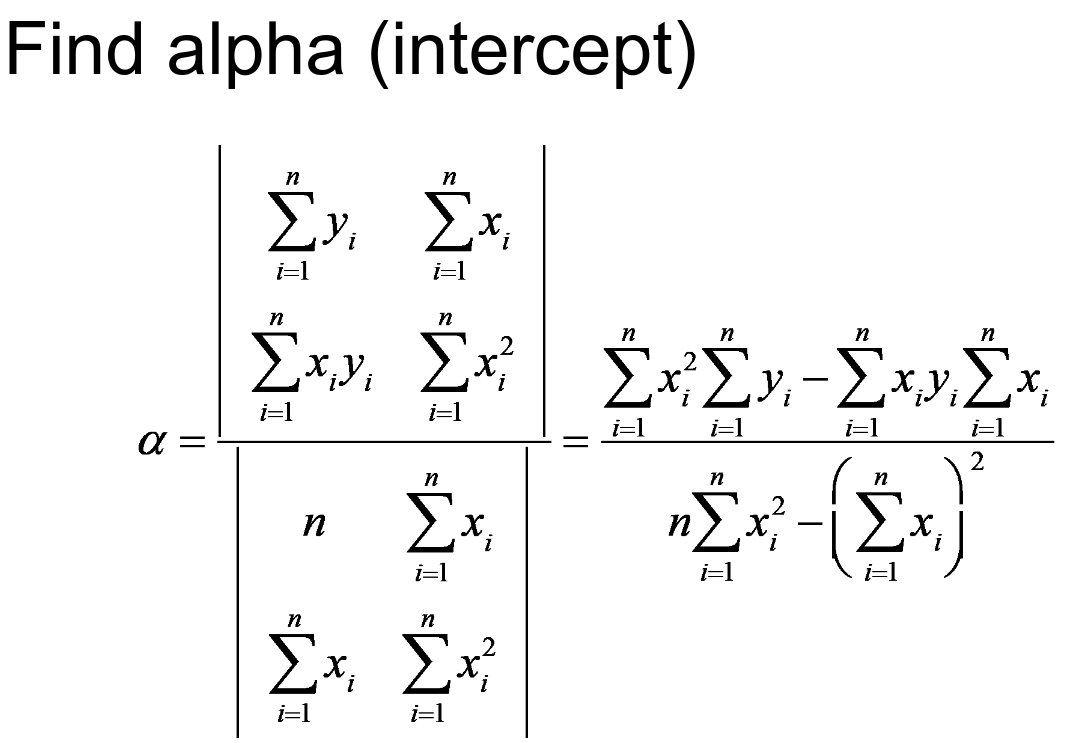

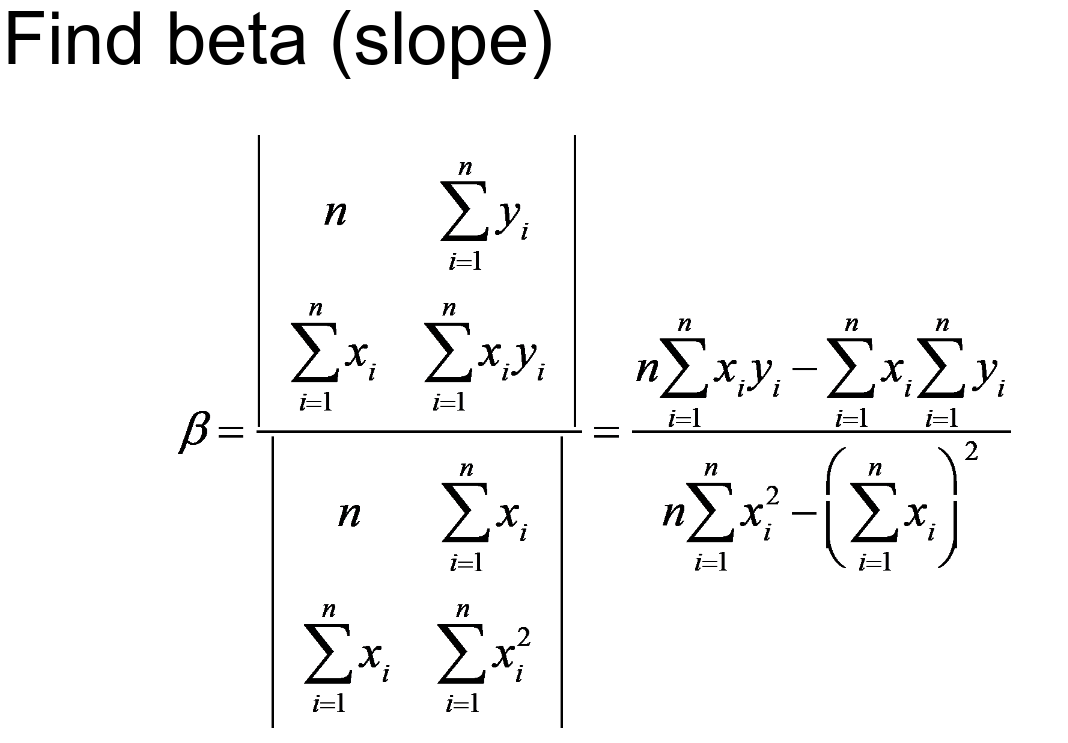

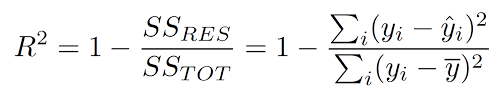


In [4]:
x = df['Advertising Budget (X)']
y = df['Sales (Y)']

In [18]:
import numpy as np
import numpy.typing as npt
from typing_extensions import Self

def r_squared_error(y,y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - np.mean(y))**2)

class OLSSimpleLinearRegression():
    def __init__(self):
        self.alpha = None # intercept
        self.beta = None # slope

    def fit(self, x: np.ndarray, y: np.ndarray) -> Self:
        if x.shape[0] != y.shape[0]:
            raise ValueError("Input arrays must have the same length")

        n = x.shape[0]
        self.alpha = (np.sum(x**2)*np.sum(y) - np.sum(x*y)*np.sum(x))/(n*np.sum(x**2) - np.sum(x)**2)
        self.beta = (n*np.sum(x*y) - np.sum(x)*np.sum(y)) / (n*np.sum(x**2) - np.sum(x)**2)
        return self

    def predict(self, x: np.ndarray) -> np.ndarray:
        if self.alpha is None or self.beta is None:
            raise ValueError("Model has not been fitted yet")
        return self.alpha + self.beta * x

    def r_squared_error(self, x: np.ndarray, y: np.ndarray) -> float:
        if self.alpha is None or self.beta is None:
            raise ValueError("Model has not been fitted yet")
        y_hat = self.predict(x)
        return r_squared_error(y, y_hat)


In [9]:
SimpleLinearRegression = OLSSimpleLinearRegression()
SimpleLinearRegression.fit(x,y)

# 2.Interpret the results

## a. Explain the meaning of the slope and intercept in the context of this problem.

In [20]:
alpha = SimpleLinearRegression.alpha
beta = SimpleLinearRegression.beta
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 1.7333333333333334
beta = 1.2666666666666666


Answer
- Intercept: The intercept (which we calculated as approximately 1.73)  represents the expected sales when no money is spent on advertising.

- Slope: The slope (which we calculated as approximately 1.27) indicates that for every additional 1000 dollars spent on the advertising budget, sales are expected to increase by approximately 1.27 units.

## b. Predict the sales if the advertising budget is $12,000.

In [22]:
SimpleLinearRegression.predict(12)

16.933333333333334

Answer
  If we increase our advertising budget to $12,000, our model estimates that sales will reach approximately 16.94 units.

# 3.Model Evaluation

## a.Calculate the R-squared value to determine the goodness of fit for your model.

In [13]:
y_hat = SimpleLinearRegression.predict(x)
r_squared_error(y,y_hat)

0.9725691893215773

## b.Provide a brief interpretation of the R-squared value obtained.

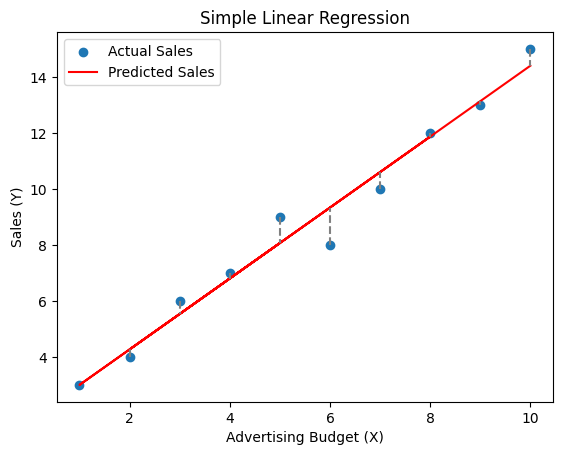

In [14]:
import matplotlib.pyplot as plt

plt.scatter(x, y, label='Actual Sales')
plt.plot(x, y_hat, color='red', label='Predicted Sales')

# Draw error lines
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_hat[i]], color='gray', linestyle='--')

plt.xlabel('Advertising Budget (X)')
plt.ylabel('Sales (Y)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


Answer As we observe the model evaluation score (r_square_error) With an R-squared of 0.9725, the model has a strong fit to the data, suggesting that the advertising budget is a very good predictor of sales. Most of the changes in sales can be attributed to changes in the advertising budget.